In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import math

In [2]:
def compute_sum(n, d):
    total_sum = 0
    for w in range(1, d + 1):
        binom_n_w = math.comb(n, w)  # Compute binomial coefficient C(n, w)
        binom_d_w = math.comb(d, w)  # Compute binomial coefficient C(d, w)
        total_sum += (2 ** w) * binom_n_w * binom_d_w  # Add the term to the sum
    return total_sum

In [8]:
##### Problem
in_dim = 2
degree = 4
shape = [in_dim, compute_sum(in_dim, degree), 1]
h = [16]
Batch_size = 16

In [11]:
print(shape)

[2, 40, 1]


In [9]:
import Neural_kan
import sys
sys.path.append(r'\\hhi.de\benutzer\home\prass\Master\Code_RNN_KAN\Test_KAN_vs_NN\Neural_kan.py') 
import importlib
importlib.reload(Neural_kan)

In [10]:
import torch
import itertools

class RandomPolynomial(torch.nn.Module):
    def __init__(self, input_dim, degree):
        super(RandomPolynomial, self).__init__()
        self.input_dim = input_dim
        self.degree = degree
        self.exponents = self.generate_exponents(degree, input_dim)
        torch.manual_seed(42)
        self.coefficients = torch.randn(len(self.exponents))
        print(self.exponents)
        print(self.coefficients)

    def forward(self, X):
        batch_size = X.shape[0]
        result = torch.zeros(batch_size, 1)

        # For each monomial (term) in the polynomial, compute the corresponding product of powers of X
        for idx, exp in enumerate(self.exponents):
            term = torch.ones(batch_size, 1)
            for dim, e in enumerate(exp):
                term *= X[:, dim].pow(e).view(-1, 1)
            result += self.coefficients[idx] * term
        return result

    def generate_exponents(self, degree, input_dim):
        exponents = []
        for exp_tuple in itertools.product(range(degree + 1), repeat=input_dim):
            if sum(exp_tuple) <= degree:
                exponents.append(exp_tuple)
        return exponents
    
poly = RandomPolynomial(input_dim=in_dim, degree=degree)


In [12]:
print(f"Total number of parameters: {sum(p.numel() for p in model.parameters())}")
print(f"Total number of parameters (excluding biases): {sum(p.numel() for p in model.parameters() if p.dim() > 1)}")


Total number of parameters: 5801
Total number of parameters (excluding biases): 3840


In [36]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)


URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:992)>

In [34]:
from sklearn.datasets import fetch_california_housing
import torch
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader

# Fetch the dataset
data = fetch_california_housing()

# Features and target
X = data.data  # Features
y = data.target  # Target (house prices)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to torch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)


c:\Users\prass\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_base.py:1472: UserWarning: Retry downloading from url: https://ndownloader.figshare.com/files/5976036
  warnings.warn(f"Retry downloading from url: {remote.url}")


URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:992)>

Epoch [1/5], Loss: 118.297347, lr: 0.001000
Epoch [2/5], Loss: 110.256272, lr: 0.001000
Epoch [3/5], Loss: 93.108539, lr: 0.001000
Epoch [4/5], Loss: 79.128874, lr: 0.001000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch [5/5], Loss: 62.667207, lr: 0.001000


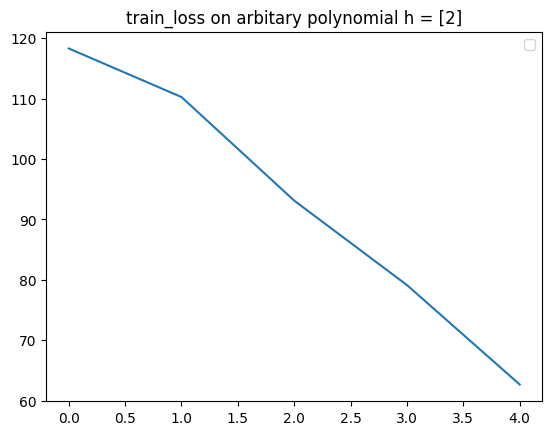

Training Complete!
Epoch [1/5], Loss: 116.751300, lr: 0.001000
Epoch [2/5], Loss: 106.325012, lr: 0.001000
Epoch [3/5], Loss: 106.733968, lr: 0.001000
Epoch [4/5], Loss: 83.823882, lr: 0.001000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch [5/5], Loss: 125.403737, lr: 0.001000


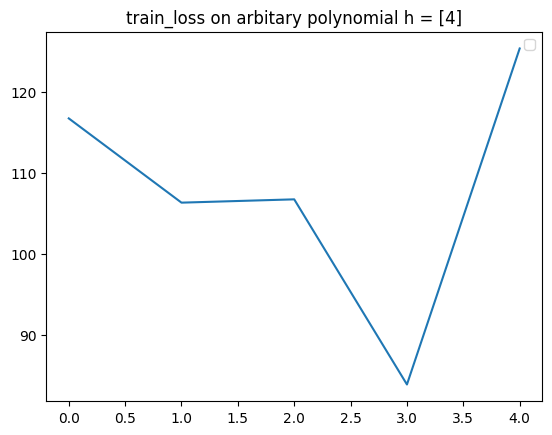

Training Complete!
Epoch [1/5], Loss: 144.354453, lr: 0.001000
Epoch [2/5], Loss: 137.104291, lr: 0.001000
Epoch [3/5], Loss: 82.172583, lr: 0.001000
Epoch [4/5], Loss: 59.526388, lr: 0.001000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch [5/5], Loss: 92.736126, lr: 0.001000


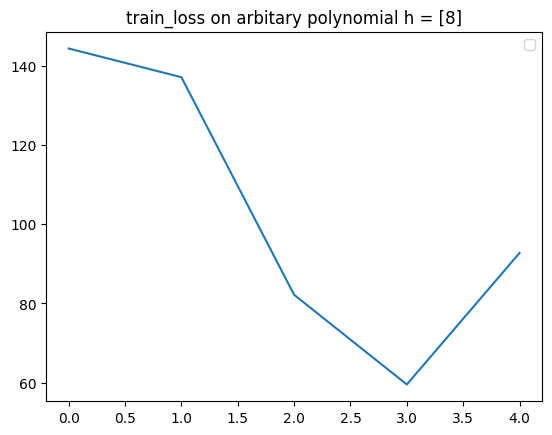

Training Complete!
Epoch [1/5], Loss: 86.447423, lr: 0.001000
Epoch [2/5], Loss: 67.750970, lr: 0.001000
Epoch [3/5], Loss: 52.278239, lr: 0.001000
Epoch [4/5], Loss: 106.769872, lr: 0.001000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch [5/5], Loss: 56.028726, lr: 0.001000


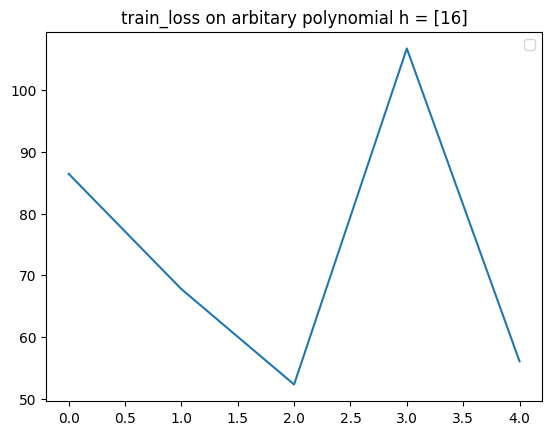

Training Complete!
Epoch [1/5], Loss: 80.728552, lr: 0.001000
Epoch [2/5], Loss: 86.079430, lr: 0.001000
Epoch [3/5], Loss: 50.724975, lr: 0.001000
Epoch [4/5], Loss: 41.489150, lr: 0.001000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch [5/5], Loss: 44.630071, lr: 0.001000


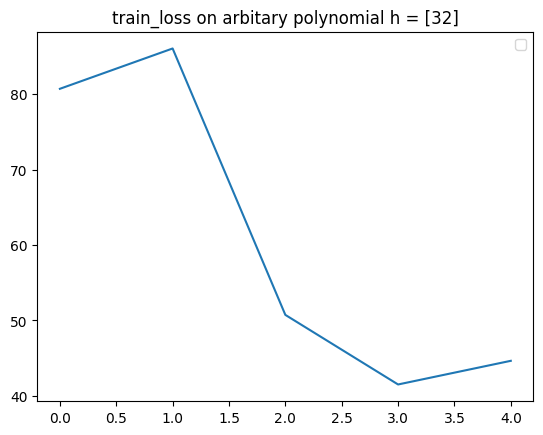

Training Complete!
Epoch [1/5], Loss: 104.395168, lr: 0.001000
Epoch [2/5], Loss: 128.895476, lr: 0.001000
Epoch [3/5], Loss: 85.187220, lr: 0.001000
Epoch [4/5], Loss: 112.567267, lr: 0.001000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch [5/5], Loss: 129.233625, lr: 0.001000


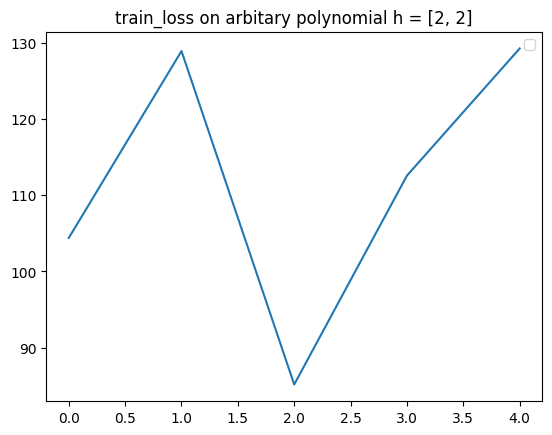

Training Complete!
Epoch [1/5], Loss: 89.572100, lr: 0.001000
Epoch [2/5], Loss: 106.959552, lr: 0.001000
Epoch [3/5], Loss: 65.840025, lr: 0.001000
Epoch [4/5], Loss: 102.283749, lr: 0.001000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch [5/5], Loss: 85.313757, lr: 0.001000


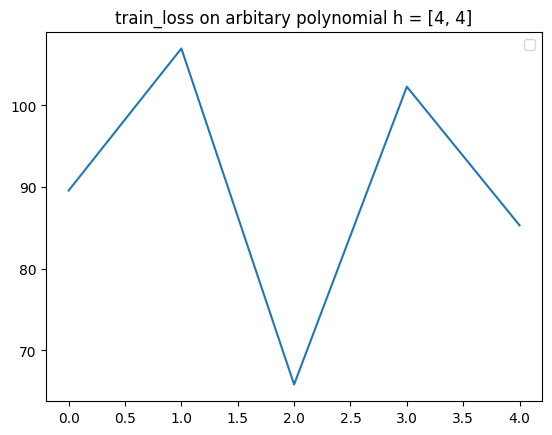

Training Complete!
Epoch [1/5], Loss: 176.789331, lr: 0.001000
Epoch [2/5], Loss: 72.289976, lr: 0.001000
Epoch [3/5], Loss: 37.967127, lr: 0.001000
Epoch [4/5], Loss: 34.284268, lr: 0.001000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch [5/5], Loss: 42.303069, lr: 0.001000


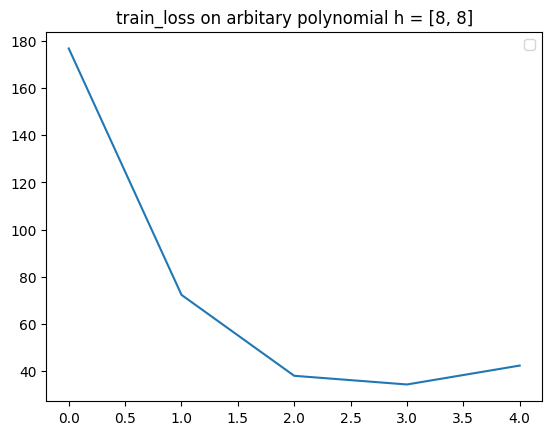

Training Complete!
Epoch [1/5], Loss: 98.404062, lr: 0.001000
Epoch [2/5], Loss: 70.863903, lr: 0.001000
Epoch [3/5], Loss: 78.018258, lr: 0.001000
Epoch [4/5], Loss: 46.776610, lr: 0.001000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch [5/5], Loss: 38.005183, lr: 0.001000


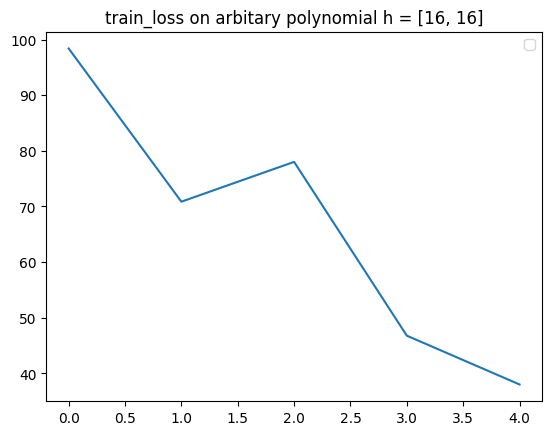

Training Complete!
Epoch [1/5], Loss: 128.090618, lr: 0.001000
Epoch [2/5], Loss: 44.615853, lr: 0.001000
Epoch [3/5], Loss: 45.503692, lr: 0.001000
Epoch [4/5], Loss: 14.863401, lr: 0.001000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch [5/5], Loss: 26.781375, lr: 0.001000


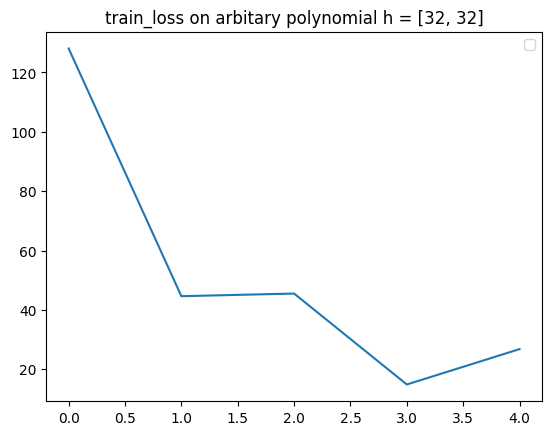

Training Complete!
Epoch [1/5], Loss: 94.760709, lr: 0.001000
Epoch [2/5], Loss: 76.174241, lr: 0.001000
Epoch [3/5], Loss: 92.179804, lr: 0.001000


In [39]:
import time
models = [] 
for depth in range(1,5):
    for i in range(1,6):
        model = Neural_kan.Neural_Kan(shape = shape, h = [2**i] * depth, device = None)
        epochs = 5
        train_loss = []
        model.train()
        optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.)
        criterion = torch.nn.MSELoss()
        for epoch in range(epochs):
            running_loss = 0.0 
            for samples in range(100):
                start_time = time.time()
                optimizer.zero_grad()
                input = torch.randn(Batch_size, in_dim)
                target = poly(input)
                outputs = model(input)
                loss = criterion(target, outputs)
                loss.backward()
                optimizer.step()
                running_loss += loss.item()
            avg_loss = running_loss / 100
            train_loss.append(avg_loss)
            print(f"Epoch [{epoch + 1}/{epochs}], Loss: {avg_loss:.6f}, lr: {optimizer.param_groups[0]['lr']:6f}")
        models.append(model)
        plt.plot(train_loss)
        plt.title(f'train_loss on arbitary polynomial h = {[2**i] * depth}')
        plt.legend()
        plt.show()
        print("Training Complete!")

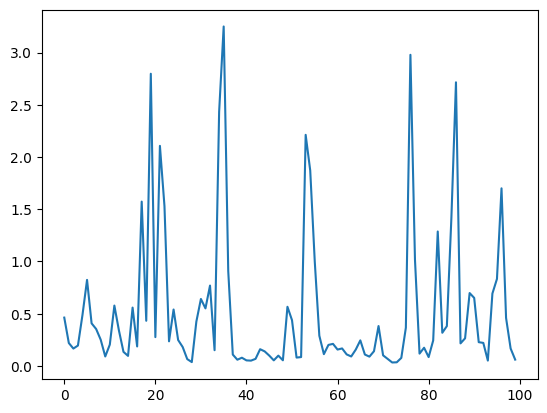

In [19]:
plt.plot(train_loss[-100:])
plt.show()

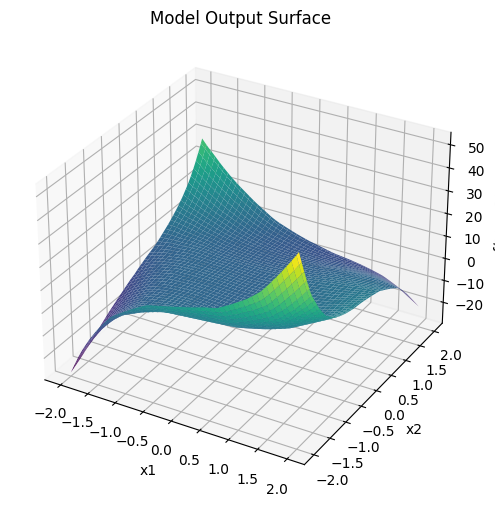

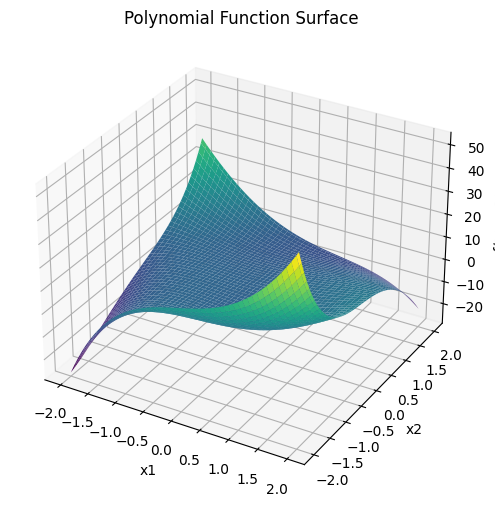

In [26]:
import torch
import matplotlib.pyplot as plt


model.eval()  # Set model to evaluation mode

# Create a grid of x1 and x2 values
x1_range = np.linspace(-2, 2, 100)
x2_range = np.linspace(-2, 2, 100)
X1, X2 = np.meshgrid(x1_range, x2_range)

# Flatten the grid and convert to torch tensor
X_input = torch.tensor(np.c_[X1.ravel(), X2.ravel()], dtype=torch.float32)

# Compute model output
with torch.no_grad():
    Z = model(X_input).numpy().reshape(X1.shape)

# Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Z, cmap='viridis')

# Labels
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1, x2)')
ax.set_title('Model Output Surface')

plt.show()

x1_range = np.linspace(-2, 2, 100)
x2_range = np.linspace(-2, 2, 100)
X1, X2 = np.meshgrid(x1_range, x2_range)

# Flatten the grid and convert to torch tensor
X_input = torch.tensor(np.c_[X1.ravel(), X2.ravel()], dtype=torch.float32)
with torch.no_grad():
    Z = poly(X_input).numpy().reshape(X1.shape)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Z, cmap='viridis')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1, x2)')
ax.set_title('Polynomial Function Surface')

plt.show()



In [27]:
poly.coefficients

Parameter containing:
tensor([-0.8828,  0.0232, -0.9740, -1.3008,  0.6536, -0.2738,  2.1751,  0.0991,
        -1.3011,  1.4721,  0.7255,  0.1220,  0.9422, -1.2801, -0.3082],
       requires_grad=True)